1. Create K-means clustering model on the dataset for one of the finance
company. The company needs to check the eligibility of the customer who
applied for the home loan. Use KMeans clustering algorithm to find the different
segments of the customers so that finance company can do the target
marketing.
a. Analyze the different features of data set.
b. Find the optimum value of k (number of clusters)
c. Create KMeans Clustering Model.
d. Visualize the number of clusters.
e. Analyze the different segments of customers.

In [1]:
# a. Analyze the different features of data set.
import pandas as pd

In [2]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [7]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
data = data.dropna()

In [54]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [55]:
X = data.iloc[:, 6:10]
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,4583,1508.0,128,360.0
1,3000,0.0,66,360.0
2,2583,2358.0,120,360.0
3,6000,0.0,141,360.0
4,2333,1516.0,95,360.0
...,...,...,...,...
376,5703,0.0,128,360.0
377,3232,1950.0,108,360.0
378,2900,0.0,71,360.0
379,4106,0.0,40,180.0


In [56]:
# b. Find the optimum value of k (number of clusters)
from sklearn.cluster import KMeans

In [57]:
sse = []
for i in range(1, 11):
    cluster = KMeans(n_clusters=i)
    labels = cluster.fit_predict(X)
    sse.append(cluster.inertia_)

In [58]:
sse

[2609273551.941866,
 1281730166.9085326,
 779076716.5271062,
 534998887.6360758,
 439047070.63607585,
 352738575.9260584,
 287712497.84002286,
 231791646.56337872,
 191694171.94109535,
 158490146.26754642]

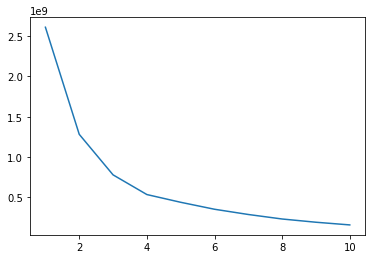

In [59]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), sse)

In [60]:
# c. Create KMeans Clustering Model.
cluster = KMeans(n_clusters=4)
Labels = cluster.fit_predict(X)

In [61]:
labels

array([0, 7, 8, 2, 8, 7, 8, 8, 4, 7, 4, 2, 8, 8, 0, 7, 7, 4, 0, 0, 0, 7,
       8, 0, 2, 2, 3, 0, 8, 7, 4, 4, 8, 8, 0, 3, 3, 7, 4, 0, 2, 4, 8, 7,
       4, 8, 4, 4, 8, 8, 3, 0, 4, 7, 8, 8, 4, 3, 3, 0, 7, 4, 4, 9, 7, 8,
       7, 7, 4, 4, 3, 0, 8, 3, 8, 4, 2, 7, 7, 8, 0, 2, 4, 3, 7, 7, 4, 0,
       8, 4, 8, 4, 7, 7, 4, 4, 4, 8, 0, 4, 4, 7, 0, 7, 7, 0, 2, 3, 0, 8,
       0, 7, 0, 3, 2, 8, 0, 4, 7, 6, 8, 2, 3, 6, 2, 2, 8, 8, 7, 8, 2, 4,
       8, 2, 4, 0, 8, 7, 8, 8, 4, 8, 0, 4, 8, 8, 3, 8, 0, 4, 0, 4, 0, 4,
       3, 8, 4, 8, 0, 0, 8, 7, 8, 7, 0, 4, 8, 4, 4, 0, 7, 0, 7, 4, 7, 7,
       0, 8, 4, 7, 4, 0, 4, 0, 2, 2, 7, 0, 4, 6, 7, 4, 2, 4, 8, 8, 4, 8,
       0, 7, 0, 0, 8, 7, 7, 5, 7, 4, 8, 7, 4, 8, 7, 8, 0, 2, 8, 3, 4, 2,
       7, 7, 2, 2, 8, 4, 8, 2, 0, 0, 4, 0, 8, 0, 8, 2, 4, 4, 4, 2, 4, 2,
       0, 0, 8, 4, 7, 3, 8, 7, 7, 4, 0, 0, 8, 7, 3, 7, 0, 0, 0, 9, 3, 8,
       7, 8, 7, 2, 4, 8, 2, 4, 7, 7, 7, 0, 7, 8, 7, 8, 4, 8, 3, 4, 4, 2,
       7, 0, 7, 0, 2, 7, 3, 8, 1, 7, 8, 8, 7, 7, 3,

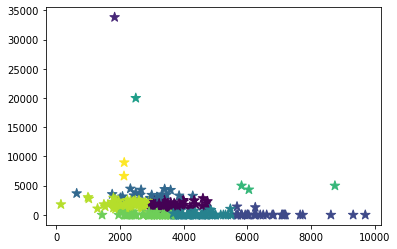

In [62]:
# d. Visualize the number of clusters.
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100, marker='*', c=labels)

In [63]:
# e. Analyze the different segments of customers.
cluster.cluster_centers_

array([[ 3596.32575758,   150.09939395,    92.62121212,   342.45454545],
       [ 2168.        , 26918.5       ,    96.5       ,   360.        ],
       [ 2809.80147059,  2289.38088226,   112.29411765,   340.58823529],
       [ 6509.13157895,   230.31578947,   119.28947368,   337.89473684]])

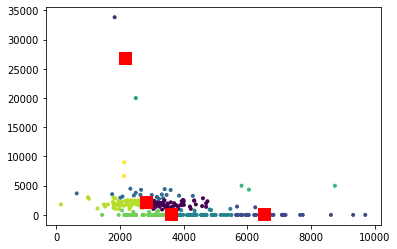

In [70]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], marker=".", c=labels)
plt.scatter(3596.32575758, 150.09939395, s=150, c='red', marker="s")
plt.scatter(2168., 26918.5, s=150, c='red', marker="s")
plt.scatter(2809.80147059, 2289.38088226, c='red', s=150, marker="s")
plt.scatter(6509.13157895, 230.31578947, c='red', s=150, marker="s")